In [135]:
import pandas as pd


# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\inmuebles_dommies.csv")
df.dropna(inplace=True)
# Muestra las primeras filas del archivo
df.head(5)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000.00,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000.00,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Casa en venta en La Princesa,La Princesa,235000000.00,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casa en venta en El Recreo,El Recreo,640000000.00,5.00,5.00,210.00,4.00,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Casa en venta en Cartagena,Cartagena,1900000000.00,3.00,3.00,200.00,6.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
numero_filas_restantes = df.shape[0]
print (numero_filas_restantes)

1166


In [139]:
# Maximos y minimos de metros cuadrados construidos.
minimo = min(df['metros_construidos'])
maximo = max(df['metros_construidos'])
print(f"Minimo de Mtr²: {minimo}, y maximo de Mtr²: {maximo}")

Minimo de Mtr²: 2.0, y maximo de Mtr²: 47679.0


In [141]:
# Se filtran los Metros cuadrados para eliminar los valores atipicos, eliminando 2 registros menores a 40 m
filtro = (df['metros_construidos'] >= 40) & (df['metros_construidos'] <= maximo) & df['metros_construidos'].notnull()
df=df[filtro].copy()
df.reset_index(drop=True, inplace=True)
df.shape

(1164, 39)

In [143]:
#Reemplazar los nombres de los barrios para correguir los que estan mal escritos y por ello duplicados

# Crear un diccionario de reemplazos, donde la clave es el nombre incorrecto y el valor es el nombre correcto
reemplazos = {
    "Amador": "Lo Amador",
    "Alameda a Vistoria": "Alameda La Victoria",
    "Castillo Grande": "Castillogrande",
    "El Centro":"Centro",
    "Getsemany": "Getsemaní",
    
}

# Reemplazar las cadenas en la columna 'localizacion' utilizando el diccionario
df['localizacion'] = df['localizacion'].replace(reemplazos)

# Mostrar el DataFrame actualizado para verificar los cambios
df.head(5)


,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000.00,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000.00,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Casa en venta en La Princesa,La Princesa,235000000.00,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Casa en venta en El Recreo,El Recreo,640000000.00,5.00,5.00,210.00,4.00,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Casa en venta en Cartagena,Cartagena,1900000000.00,3.00,3.00,200.00,6.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# Resumen completo
resumen_completo = df.describe(include='all')
print(resumen_completo)

                            titulo localizacion            precio   baños  \
count                         1164         1164           1164.00 1164.00   
unique                         132          127               NaN     NaN   
top     Casa en venta en Cartagena    Cartagena               NaN     NaN   
freq                           224          224               NaN     NaN   
mean                           NaN          NaN    15076716134.34    3.82   
std                            NaN          NaN   425334539675.13    2.16   
min                            NaN          NaN              1.00    2.00   
25%                            NaN          NaN      450000000.00    3.00   
50%                            NaN          NaN      930585750.00    3.00   
75%                            NaN          NaN     2362500000.00    5.00   
max                            NaN          NaN 14500000000000.00   53.00   

        habitabiones  metros_construidos  estrato  parqueadero  gas_natural

In [147]:
# Eliminar filas donde 'localizacion' contiene los valores específicos
df = df[~df['localizacion'].str.contains('Cartagena', na=False)]

In [149]:
numero_filas_restantes = df.shape[0]
print (numero_filas_restantes)

880


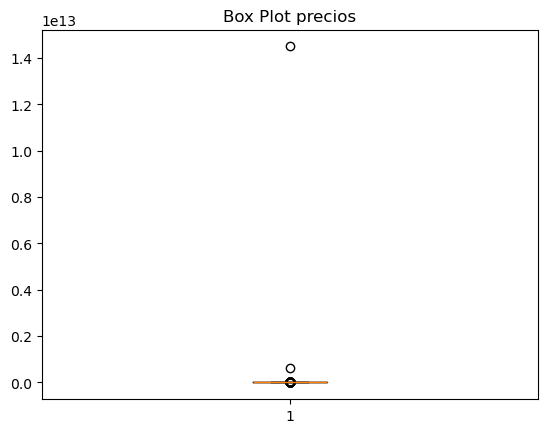

In [151]:
# Caja de bigotes para ver la distribucion de los precios 
plt.boxplot(df['precio'])

# Título y etiquetas
plt.title("Box Plot precios")

# Mostrar el gráfico
plt.show()

In [181]:
#Se filtra las propiedades entre sesenta millones y Treinta mil millones para eliminar los valores atipicos
filtro=(df['precio'] > 60000000) & (df['precio']<30000000000)
df=df[filtro].copy()
df.shape

(840, 39)

In [193]:
# Precios maximos y minimos.
pminimo = min(df['precio'])
pmaximo = max(df['precio'])
print(f"Minimo de Precio: {pminimo}, y maximo: {pmaximo}")

Minimo de Precio: 165000000.0, y maximo: 9500000000.0


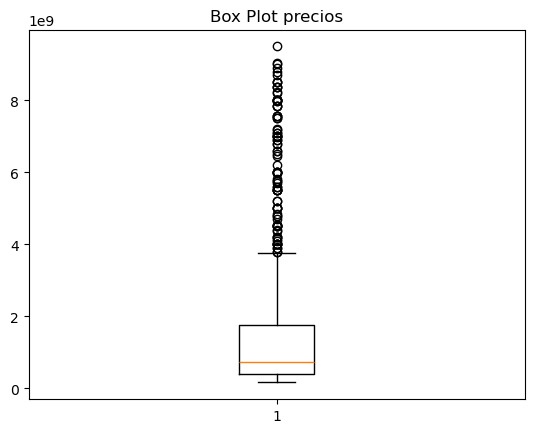

In [189]:
# Caja de bigotes para ver la nueva distribucion de los precios 
plt.boxplot(df['precio'])

# Título y etiquetas
plt.title("Box Plot precios")

# Mostrar el gráfico
plt.show()

In [263]:
# Precio maximo y minimo por barrio
rango_precio = df.groupby('localizacion')['precio'].agg(['max', 'min'])
rango_precio.head(5)


,max,min
localizacion,,
11 de Noviembre,260000000.00,260000000.00
13 de Junio,1250000000.00,220000000.00
Alameda La Victoria,3600000000.00,260000000.00
Almirante Colon,450000000.00,250000000.00
Alpes,280000000.00,280000000.00


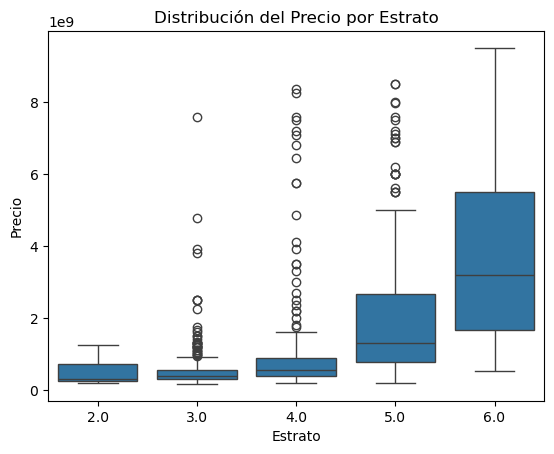

In [191]:
#Viendo la cantidad de valores atipicos se profundiza en los datos, observando la relacion entre precio y estrato

sns.boxplot(x='estrato', y='precio', data=df)

# Título y etiquetas
plt.title('Distribución del Precio por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()


In [257]:
# Calculo del valor promedio de metro cuadrado por barrio

# Precio por metro cuadrado
df['precio_m2'] = df['precio'] / df['metros_construidos']

# Agrupar por barrio y calcular el promedio del precio por metro cuadrado
promedio_m2_por_barrio = df.groupby('localizacion')['precio_m2'].mean().reset_index()

# Ordenar de mayor a menor según el precio por metro cuadrado
promedio_m2_por_barrio = promedio_m2_por_barrio.sort_values(by='precio_m2', ascending=False)


# Mostrar el resultado
promedio_m2_por_barrio.head(5)


,localizacion,precio_m2
89,San Diego,17561340.28
22,Centro,15145902.69
50,Getsemaní,12979698.50
81,Olaya St. Rafael Nuñez,11397058.82
31,El Cabrero,10473408.71


In [159]:
# Cantidad de Casas en venta en los diferentes estratos

frecuencia_estratos = df["estrato"].value_counts()
print(frecuencia_estratos)

estrato
3.00    240
5.00    235
4.00    219
6.00    120
2.00     26
Name: count, dtype: int64


In [267]:
# Agrupar por estrato y calcular el promedio del precio por metro cuadrado
promedio_m2_por_estrato = df.groupby('estrato')['precio_m2'].mean().reset_index()
promedio_m2_por_estrato.head(5)

,estrato,precio_m2
0,2.00,2711027.19
1,3.00,2611287.06
2,4.00,4180167.79
3,5.00,5896973.24
4,6.00,10494220.11


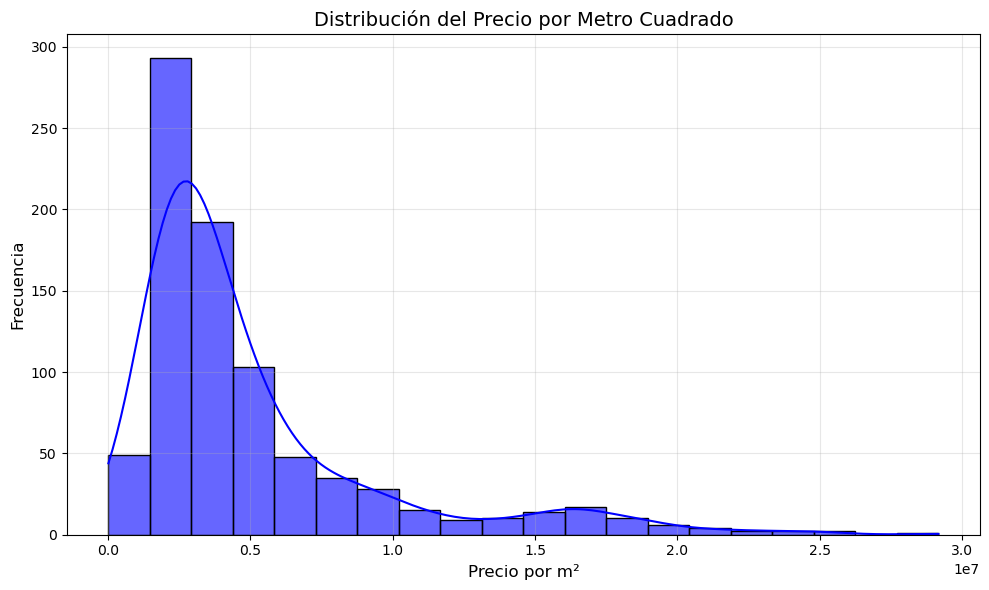

In [269]:
# Crear el histograma usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['precio_m2'], bins=20, kde=True, color='blue', alpha=0.6)

# Etiquetas y título
plt.title('Distribución del Precio por Metro Cuadrado', fontsize=14)
plt.xlabel('Precio por m²', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [161]:
# Cairgar las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
#import geopandas as gpd
from folium.plugins import HeatMap

In [195]:
# Agrupar los datos por la columna 'localizacion' y promediar el precio por barrio.
conteo_localizacion = df.groupby("localizacion").precio.mean().reset_index()

# Ordenar los resultados de mayor a menor por 'precio'
conteo_localizacion_filtrado_sorted = conteo_localizacion.sort_values(by='precio', ascending=False)

# Mostrar el resultado
print(conteo_localizacion_filtrado_sorted)


                  localizacion        precio
89                   San Diego 6106347000.85
22                      Centro 5783825096.12
54               La Candelaria 4850000000.00
50                   Getsemaní 4582210626.00
31                  El Cabrero 4521428571.43
..                         ...           ...
121    Villas de la Candelaria  220000000.00
95                 Santa Clara  203250000.00
53                  La Campiña  183077400.00
23                    Chapacua  180000000.00
110  Urbanización Las Palmeras  170000000.00

[124 rows x 2 columns]


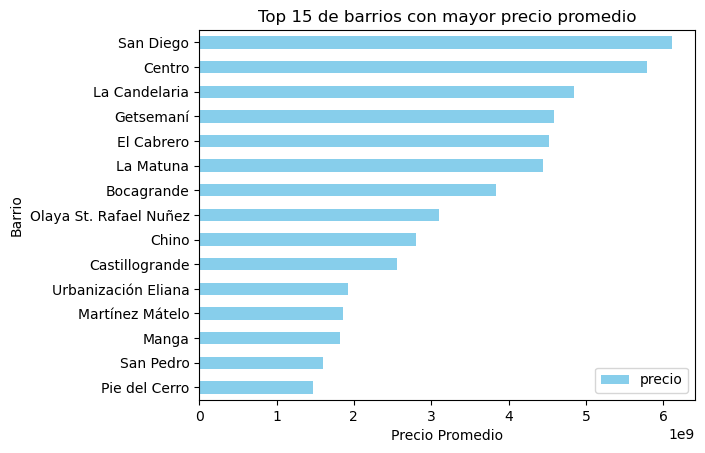

In [165]:
import matplotlib.pyplot as plt

# Una vez agrupado y ordenado se grafica un top de los 15 barrios con mayor promedio de precio venta.

conteo_localizacion_filtrado_sorted.head(15).iloc[::-1].plot(kind='barh', color='skyblue', x='localizacion', y='precio')

# Añadir etiquetas y título
plt.title('Top 15 de barrios con mayor precio promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Barrio')

# Mostrar el gráfico
plt.show()

In [167]:
# Cantidad de Casas en venta en los diferentes barrios

frecuencia_barrios = df["localizacion"].value_counts()
print(frecuencia_barrios)

localizacion
Manga                     132
Pie de Popa                51
Centro                     41
El Recreo                  37
Castillogrande             37
                         ... 
La Troncal                  1
Alpes                       1
El Gallo                    1
Olaya St. Rafael Nuñez      1
11 de Noviembre             1
Name: count, Length: 124, dtype: int64


In [169]:
# Se utiliza la libreria geopandas para ubicar y graficar los barrios en el mapa de Cartagena

# Cargar y leer el archivo .shp  en el que se aprecia el mapa de cartagena.
gdf = gpd.read_file("C:\\Users\\LENOVO\\Downloads\\proyecto-analisis-de-datos-main\proyecto-analisis-de-datos-main\\Data\\shapefiles\\Barrios\\Barrios.shp")
gdf=gdf.iloc[:185]
# Muestra las primeras filas del GeoDataFrame
print(gdf.head())

  CODIGO                NOMBRE  UCG LOC  AREA_HA  PE  POB_BARRIO  TOTAL_HOMB  \
0   0150       DANIEL LEMAITRE 3.00  LH    59.67  P3    17346.00     8506.00   
1   0200           SANTA MARIA 3.00  LH     8.75  P2     5396.00     2634.00   
2   0250              CANAPOTE 3.00  LH    23.60  P2     7750.00     3750.00   
3   0300  SAN PEDRO Y LIBERTAD 2.00  LH    17.19  P2     4440.00     2195.00   
4   0350       SIETE DE AGOSTO 3.00  LH    12.82  P2     6751.00     3295.00   

   TOTAL_MUJE  NO_LEE_ESC                                           geometry  
0     8840.00     1436.00  POLYGON ((842131.215 1645842.043, 842048.374 1...  
1     2762.00      451.00  POLYGON ((842462.954 1646801.211, 842457.697 1...  
2     4000.00      679.00  POLYGON ((841472.83 1646291.422, 841471.824 16...  
3     2245.00      370.00  POLYGON ((841414.301 1646838.488, 841411.788 1...  
4     3456.00      638.00  POLYGON ((842701.018 1646249.319, 842692.207 1...  


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20364\1571526992.py:4: SyntaxWarning: invalid escape sequence '\p'
  gdf = gpd.read_file("C:\\Users\\LENOVO\\Downloads\\proyecto-analisis-de-datos-main\proyecto-analisis-de-datos-main\\Data\\shapefiles\\Barrios\\Barrios.shp")


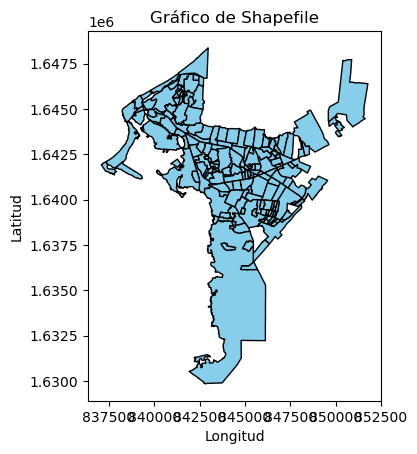

In [171]:
# Grafica el contenido geoespacial del archivo .shp
gdf.plot(color='skyblue', edgecolor='black')

# Añadir título y etiquetas si es necesario
plt.title('Gráfico de Shapefile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Muestra el gráfico
plt.show()

In [197]:
# Convierte los nombres de localización y NOMBRE a minúsculas
conteo_localizacion['localizacion'] = conteo_localizacion['localizacion'].str.lower()
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()

In [199]:
print(gdf['NOMBRE'].dtype)
print(conteo_localizacion.index.dtype)

object
int64


In [201]:
# Convertir el índice de conteo_localizacion a cadenas
conteo_localizacion.set_index('localizacion', inplace=True)
conteo_localizacion.index = conteo_localizacion.index.astype(str)

# Realizar el merge
gdf_conteo = gdf.merge(conteo_localizacion, left_on='NOMBRE', right_index=True, how='left')

# Verificar el resultado del merge
print(gdf_conteo)

    CODIGO                    NOMBRE   UCG LOC  AREA_HA  PE  POB_BARRIO  \
0     0150           daniel lemaitre  3.00  LH    59.67  P3    17346.00   
1     0200               santa maria  3.00  LH     8.75  P2     5396.00   
2     0250                  canapote  3.00  LH    23.60  P2     7750.00   
3     0300      san pedro y libertad  2.00  LH    17.19  P2     4440.00   
4     0350           siete de agosto  3.00  LH    12.82  P2     6751.00   
..     ...                       ...   ...  ..      ...  ..         ...   
180   0060            flor del campo  6.00  LV    13.96  P2        0.00   
181   0080       ciudad bicentenario  6.00  LV   402.02  P2        0.00   
182   0070  urbanizacion colombiaton  6.00  LV    13.54  P2        0.00   
183   0090   villas de la candelaria  6.00  LV    17.71  P2        0.00   
184   8970           zona industrial 11.00  LI  1920.24  PC        0.00   

     TOTAL_HOMB  TOTAL_MUJE  NO_LEE_ESC  \
0       8506.00     8840.00     1436.00   
1       2634.

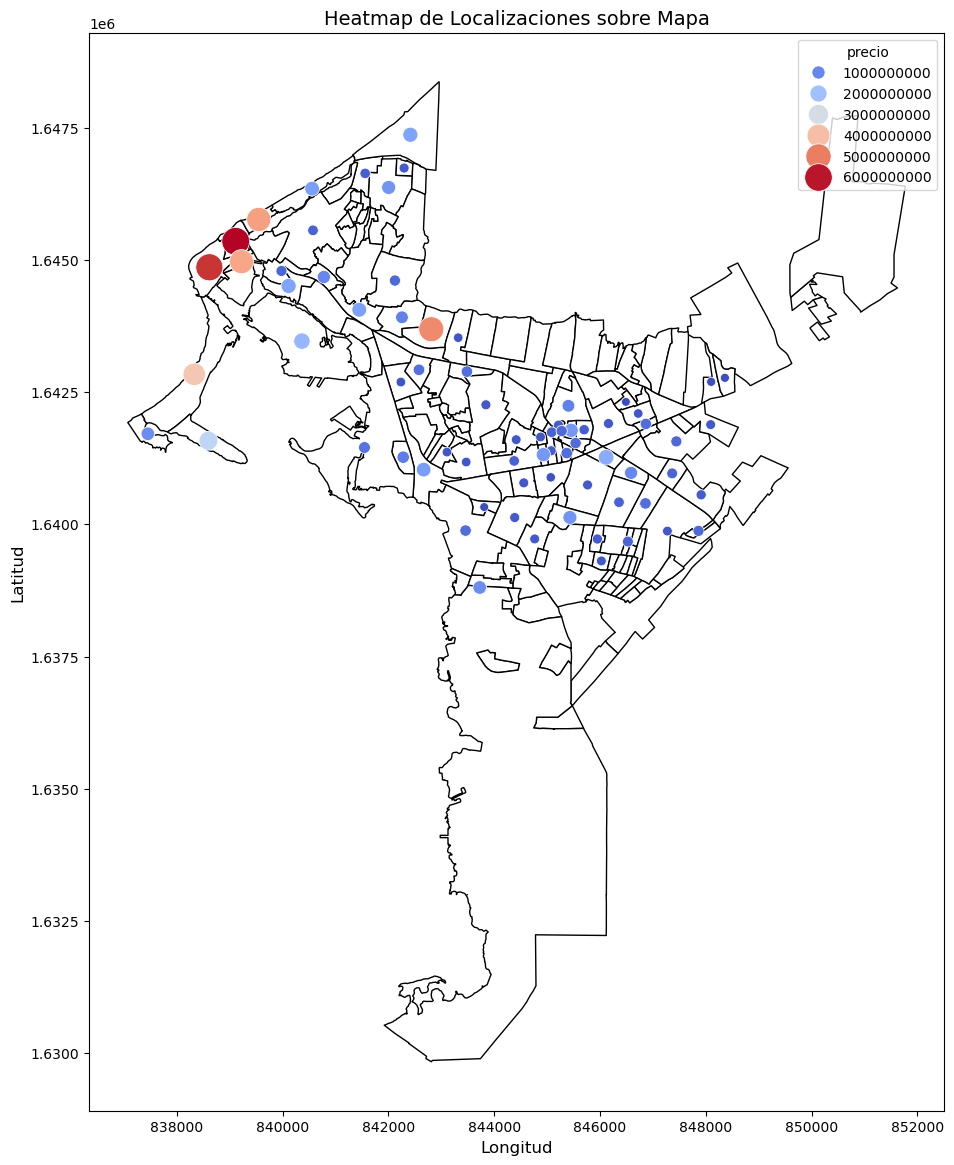

In [207]:
# centroides de geometry
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 14))

# Graficar el shapefile en el fondo (el mapa)
gdf.plot(ax=ax, color='white', edgecolor='black')

# Graficar el heatmap de acuerdo con las ubicaciones (usando las coordenadas del centroide)
sns.scatterplot(x=gdf_conteo['x'], 
                y=gdf_conteo['y'], 
                hue=gdf_conteo['precio'], 
                palette='coolwarm',  # Paleta de colores
                size=gdf_conteo['precio'],  # Tamaño de los puntos según el conteo
                sizes=(40, 400),  # Rango de tamaños de los puntos
                legend=True,  # Desactiva la leyenda si no la necesitas
                ax=ax)  # Usa el mismo eje para superponer el gráfico

# Añadir título y etiquetas
plt.title('Heatmap de Localizaciones sobre Mapa', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)

# Mostrar el gráfico
plt.show()

In [205]:
from shiny import App
from components.ui import app_ui
from components.server import server

app = App(app_ui, server).run()

ModuleNotFoundError: No module named 'shiny'